In [1]:
from google.colab import files
files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


{'Wholesale customers data.csv': b'Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen\r\n2,3,12669,9656,7561,214,2674,1338\r\n2,3,7057,9810,9568,1762,3293,1776\r\n2,3,6353,8808,7684,2405,3516,7844\r\n1,3,13265,1196,4221,6404,507,1788\r\n2,3,22615,5410,7198,3915,1777,5185\r\n2,3,9413,8259,5126,666,1795,1451\r\n2,3,12126,3199,6975,480,3140,545\r\n2,3,7579,4956,9426,1669,3321,2566\r\n1,3,5963,3648,6192,425,1716,750\r\n2,3,6006,11093,18881,1159,7425,2098\r\n2,3,3366,5403,12974,4400,5977,1744\r\n2,3,13146,1124,4523,1420,549,497\r\n2,3,31714,12319,11757,287,3881,2931\r\n2,3,21217,6208,14982,3095,6707,602\r\n2,3,24653,9465,12091,294,5058,2168\r\n1,3,10253,1114,3821,397,964,412\r\n2,3,1020,8816,12121,134,4508,1080\r\n1,3,5876,6157,2933,839,370,4478\r\n2,3,18601,6327,10099,2205,2767,3181\r\n1,3,7780,2495,9464,669,2518,501\r\n2,3,17546,4519,4602,1066,2259,2124\r\n1,3,5567,871,2010,3383,375,569\r\n1,3,31276,1917,4469,9408,2381,4334\r\n2,3,26373,36423,22019,5154,4337,16523\r\n2,3

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("Wholesale customers data.csv")

In [5]:
print("Shape Dataset:", df.shape)
display(df.head())


Shape Dataset: (440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
if 'Channel' in df.columns:
    df = df.drop(['Channel', 'Region'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

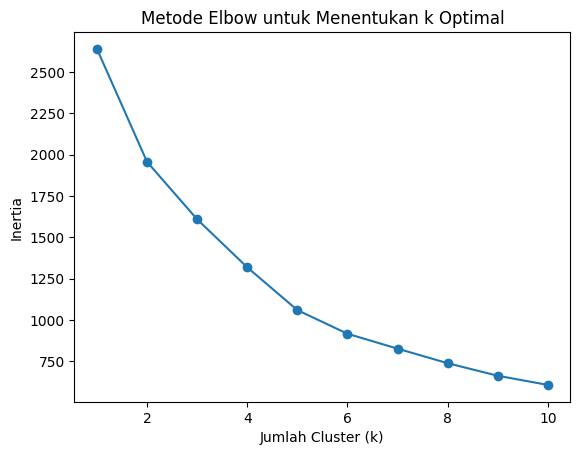

In [8]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()

In [9]:
k_optimal = 3
model = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['Cluster'] = model.fit_predict(X_scaled)

In [10]:
print("\nRata-rata pengeluaran tiap cluster:\n")
print(df.groupby('Cluster').mean())


Rata-rata pengeluaran tiap cluster:

                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0        10440.933333  19386.422222  28656.088889   2190.244444   
1        12062.913486   4115.099237   5534.966921   2940.676845   
2        34782.000000  30367.000000  16898.000000  48701.500000   

         Detergents_Paper    Delicassen  
Cluster                                  
0            13327.800000   2374.200000  
1             1696.170483   1299.114504  
2              755.500000  26776.000000  


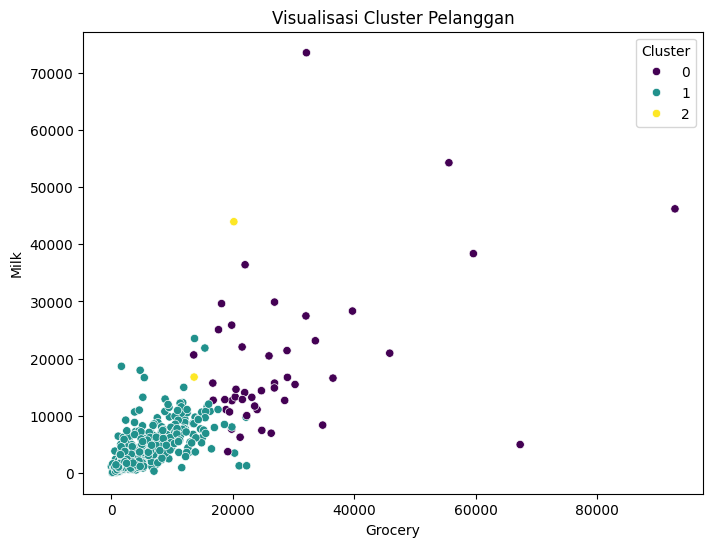

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Grocery'], y=df['Milk'], hue=df['Cluster'], palette='viridis')
plt.title("Visualisasi Cluster Pelanggan")
plt.xlabel("Grocery")
plt.ylabel("Milk")
plt.show()